## Get some ML model going
## Start with loading cleansed data

In [170]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [171]:
data=pd.read_csv('AmesHousingALL_cln.csv')
price=np.load('Sale_Price.npy')

In [172]:
#drop all unamed:
data=data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'])

In [173]:
# take out SalePrice column
data=data.drop(columns=['SalePrice'])
y=price
print(data.shape)
print(price.shape)

(2930, 82)
(2930,)


In [174]:
# train-test split
train_X=data[0:1200]
train_y=price[0:1200]
test_X=data[1201:len(data)]
test_y=price[1201:len(price)]

In [175]:
train_X.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,Bsmt Bath,Total House SF,Total Bath
0,20,4,141.0,31770,1,1,0,3,4,0,...,4,0,0,5,2010,0,3,0.50,3449.0,2.0
1,20,7,80.0,11622,1,1,3,3,4,4,...,2,0,0,6,2010,0,3,0.00,2188.0,1.0
2,20,4,81.0,14267,1,1,0,3,4,0,...,4,1,12500,6,2010,0,3,0.00,3493.0,2.0
3,20,4,93.0,11160,1,1,3,3,4,0,...,4,0,0,4,2010,0,3,0.25,5265.0,4.0
4,60,4,74.0,13830,1,1,0,3,4,4,...,2,0,0,3,2010,0,3,0.00,2940.0,3.0


In [10]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model.base:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin)
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional, default True
 |      whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean and dividing by the l2-norm.
 |      If you wish to standardize, please use
 |      :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
 |      an estimator with ``normalize=False``.
 |  
 |  copy_X : boolean, optional, default True
 |      If True, X will be copied; else, it may be overwritten.
 | 

In [177]:
regr0 = linear_model.LinearRegression()

In [178]:
# plug in the data to do a first fit
regr0.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [179]:
p_prc_train=regr0.predict(train_X) # do some predicition

/NFS/home/home1/twang12/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/NFS/home/home1/twang12/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


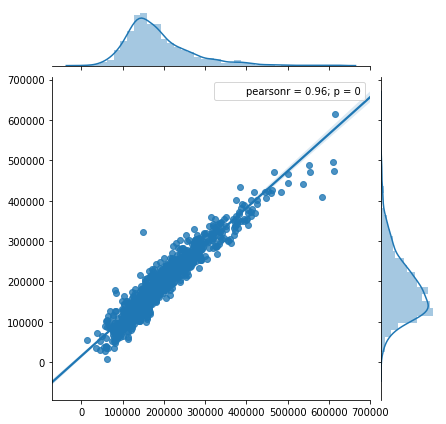

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.jointplot(x=train_y, y=p_prc_train, data=data, kind="reg");
plt.show()

In [181]:
print((train_y-p_prc_train).sum())  
### *******This is quite shocking that he regression model predicts exactly the same value???
### it is not doing any prediction???

-7.63684511185e-08


In [182]:
p_prc_test=regr0.predict(test_X) # do some predicition

In [183]:
weights=zip(list(data.columns),regr0.coef_) # use a iterable to print the coefficient and their corresponding column name
for cols, coef in weights:
    print(cols,':',coef)

MS SubClass : -69.7037317262
MS Zoning : -2411.56244984
Lot Frontage : 51.2070590966
Lot Area : 0.609708504315
Street : 6702.56770519
Alley : 2387.55259437
Lot Shape : -83.8122666321
Land Contour : -1549.0890972
Utilities : 15392.0437792
Lot Config : 415.410693446
Land Slope : 4530.74425942
Neighborhood : 56.5636384884
Condition 1 : -1176.01623777
Condition 2 : 11038.3956258
Bldg Type : -1035.59590361
House Style : 4036.27478387
Overall Qual : 7767.68028301
Overall Cond : 7056.40679884
Year Built : 433.871825812
Year Remod/Add : -88.5684832109
Roof Style : 952.483367856
Roof Matl : -3566.66037501
Exterior 1st : 157.271415052
Exterior 2nd : -241.486865721
Mas Vnr Type : 6419.82507621
Mas Vnr Area : 42.5839585159
Exter Qual : 10135.4355535
Exter Cond : -2059.06483584
Foundation : 290.572556941
Bsmt Qual : 8389.89138653
Bsmt Cond : -6109.83128509
Bsmt Exposure : 1780.41342172
BsmtFin Type 1 : -1247.91177081
BsmtFin SF 1 : 54.7931149016
BsmtFin Type 2 : 130.986519561
BsmtFin SF 2 : 39.8300

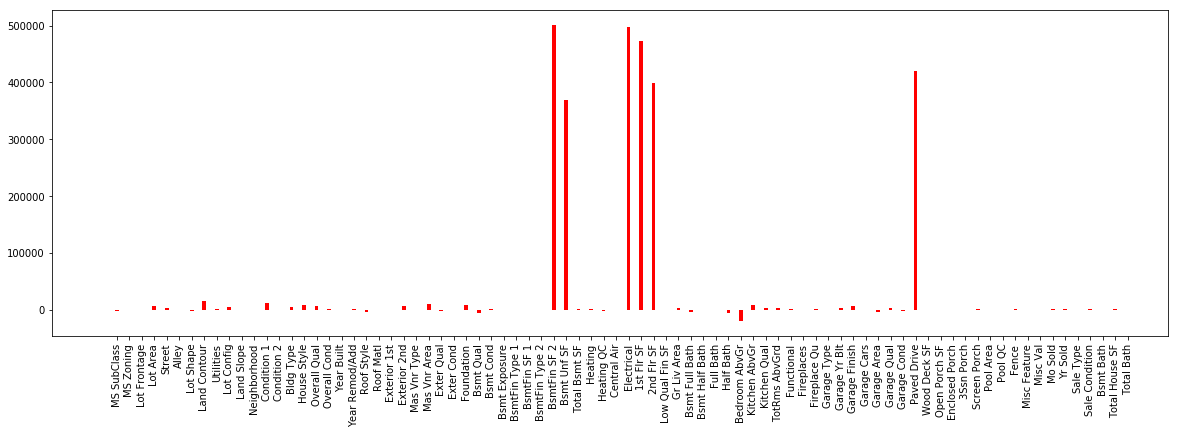

In [218]:
# plot a histogram chart to illustrate :

x_tick_label=list(data.columns)
hist_val=regr0.coef_
fig, ax = plt.subplots(figsize=(20,6))
index=np.arange(len(regr0.coef_))
ax.bar(index,hist_val, .3, color='r')
ax.set_xticks(range(1, 83, 1))
ax.set_xticklabels(x_tick_label, rotation='vertical')
plt.show()

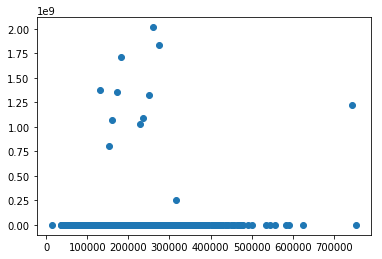

In [113]:
plt.scatter(test_y,p_prc_test)
plt.show()

In [184]:
print((test_y-p_prc_test).sum())  

2617349.62693


In [185]:
# Try the Random Forest model
from sklearn.ensemble import RandomForestRegressor
RF_regr = RandomForestRegressor(random_state=1)

In [186]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble.forest:

class RandomForestRegressor(ForestRegressor)
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and use averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is always the same as the original
 |  input sample size but the samples are drawn with replacement if
 |  `bootstrap=True` (default).
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators : integer, optional (default=10)
 |      The number of trees in the forest.
 |  
 |  criterion : string, optional (default="mse")
 |      The function to measure the quality of a split. Supported criteria
 |      are "mse" for the mean squared error, which is equal to variance
 |      reduction as feature selection criterion, and "mae" for the mean
 |      absolute 

In [187]:
RF_regr.fit(train_X,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [188]:
pRF_prc_train=RF_regr.predict(train_X) # do some predicition

/NFS/home/home1/twang12/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/NFS/home/home1/twang12/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


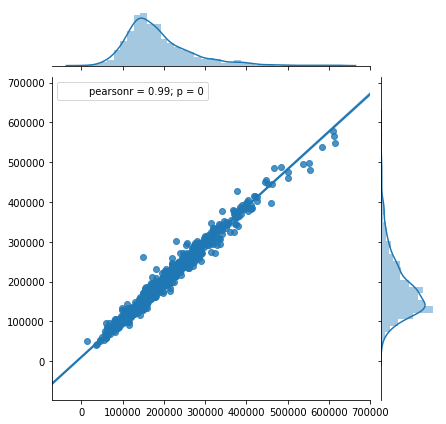

In [189]:
sns.jointplot(x=train_y, y=pRF_prc_train, data=data, kind="reg");
plt.show()

In [190]:
pRF_prc_test=RF_regr.predict(test_X) # do some predicition

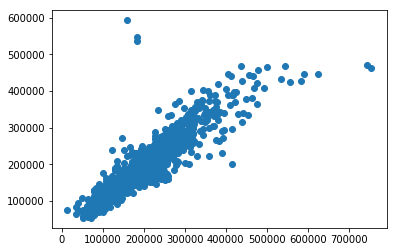

In [191]:
plt.scatter(test_y,pRF_prc_test)
plt.show()

In [212]:
# Take a look at the feature importance
f_importance = pd.DataFrame({'feature':data.columns, 'importance':RF_regr.feature_importances_})
f_importance.sort_values(['importance'],ascending=False)

,feature,importance
16,Overall Qual,5.805906e-01
45,Gr Liv Area,8.467562e-02
33,BsmtFin SF 1,5.764548e-02
61,Garage Area,3.731158e-02
80,Total House SF,3.206327e-02
81,Total Bath,2.452078e-02
18,Year Built,1.933955e-02
52,Kitchen Qual,1.916533e-02
26,Exter Qual,9.654750e-03
3,Lot Area,9.442060e-03


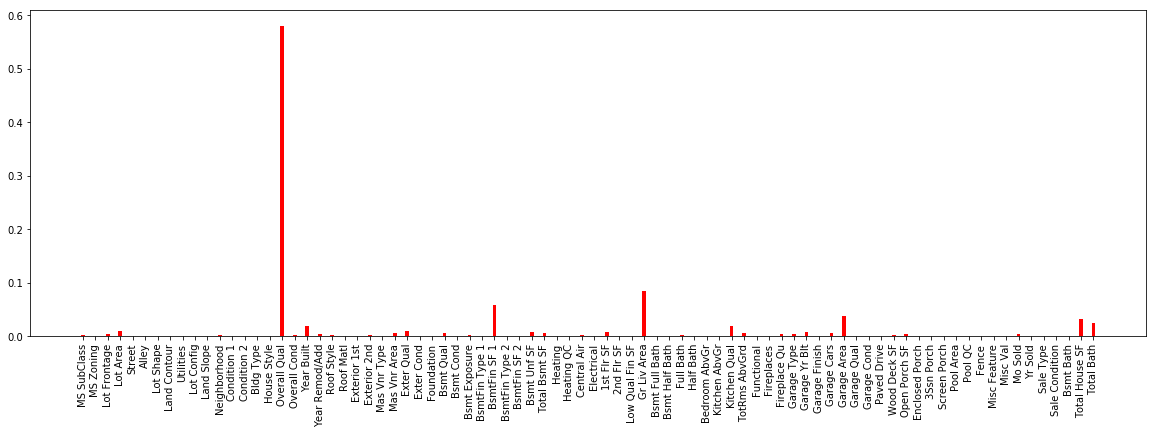

In [220]:
# plot a histogram chart to illustrate :
x_tick_label=list(data.columns)
hist_val=RF_regr.feature_importances_
fig, ax = plt.subplots(figsize=(20,6))
index=np.arange(len(regr0.coef_))
ax.bar(index,hist_val, .3, color='r')
ax.set_xticks(range(0, 82, 1))
ax.set_xticklabels(x_tick_label, rotation='vertical')
plt.show()

In [192]:
# select subset data that contains one neighborhood
NAmes_df=data.loc[data['Neighborhood']==17]

In [193]:
NAmes_df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,Bsmt Bath,Total House SF,Total Bath
19,20,4,85.0,13175,1,1,3,3,4,4,...,2,0,0,2,2010,0,3,0.333333,4553.0,3.0
20,20,4,105.0,11751,1,1,0,3,4,4,...,2,0,0,1,2010,5,3,0.000000,4949.0,2.0
21,85,4,85.0,10625,1,1,3,3,4,4,...,2,0,0,1,2010,0,2,0.333333,2346.0,3.0
110,20,4,0.0,10456,1,1,0,3,4,4,...,4,0,0,5,2010,0,3,0.333333,5057.0,3.0
111,60,4,80.0,10791,1,1,3,3,4,4,...,4,0,0,3,2010,0,3,0.250000,4174.0,4.0


In [194]:
ind=NAmes_df.index

In [196]:
#fetch the price of house based on index
NAmes_prc=price[ind]

In [153]:
#observe some distribution of the attributes
for col in NAmes_df.columns:
    print(NAmes_df[col].describe())

count    131.000000
mean      44.923664
std       27.167463
min       20.000000
25%       20.000000
50%       60.000000
75%       60.000000
max      190.000000
Name: MS SubClass, dtype: float64
count    131.0
mean       4.0
std        0.0
min        4.0
25%        4.0
50%        4.0
75%        4.0
max        4.0
Name: MS Zoning, dtype: float64
count    131.000000
mean      52.893130
std       40.263794
min        0.000000
25%        0.000000
50%       78.000000
75%       80.000000
max      130.000000
Name: Lot Frontage, dtype: float64
count      131.000000
mean     11661.694656
std       2480.699358
min       8000.000000
25%      10140.000000
50%      10928.000000
75%      12386.000000
max      20781.000000
Name: Lot Area, dtype: float64
count    131.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Street, dtype: float64
count    131.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.

In [201]:
# do a function calculating the price difference
def diff_cal2(a):
    import numpy as np
    import time
    start_time = time.time()
    dim = len(a)
    diff_mat = np.zeros((dim, dim))
    for i in range(dim):
         diff_mat[i] = np.subtract(a[i], a)
    print("--- %s seconds ---" % (time.time() - start_time))
    return diff_mat

In [202]:
NAmes_dif_pric=diff_cal2(NAmes_prc)

--- 0.0004115104675292969 seconds ---


In [221]:
diffy=NAmes_dif_pric.flatten()

In [228]:
NAmes_dif_pric[0:2,:]

array([[      0.,   20000.,   40000.,   -8500.,  -33500.,    5000.,
          -2500.,   13500.,   12500.,   39000.,   67000.,  -50000.,
          29000.,  127500.,   -5000.,   56000.,   10000.,  -39000.,
          22500.,   26000.,  -68000.,   53000.,   58000.,   12500.,
          -3000.,   42100.,   52000.,   45000.,   52000.,   56000.,
          25000.,   24250.,   10000.,    4000.,   48000.,  -46900.,
          12100.,   47000.,   97000.,  -20000.,   42100.,   -3250.,
         -17000.,   41500.,   37500.,   48500.,   -5000.,  -16500.,
          34500.,   28100.,  -25000.,  -10000.,  -62000.,   49000.,
          35000.,   25000.,   63100.,  -82500.,   30000.,   50100.,
           5000.,   53000.,  -96000.,   36000.,   27000.,   60000.,
          65000.,   -5000.,   69500.,  -30000.,   75000.,   40000.,
         -89800.,   25000.,   37000.,   34000.,   27100.,   36000.,
          32000.,   34000.,   -3000.,   18000.,   20000.,   15000.,
          62000.,   58500.,   13000.,   17650., 

In [266]:
# construct an dataframe that does the difference for all rows to all other rows;
def dif_df(data):
    """This function does a difference for each row to all other rows in consecutive order,"""
    """It should output row1:column A difference row 1 to row1 (0), column B difference row 1 to row 1(0) ....end of column , and then the next row in the new dataframe is :""" 
    """row2: column A difference row 1 to row2, column B difference row 1 to row 2 ....end of column , and then the next row in the new dataframe is :"""
    """row3: column A difference row1 to row3, column B difference row1 to row 3,.... end of column"""
    # initializing blank dataframe ;
    ndf= pd.DataFrame(columns=data.columns)
    ndf= ndf.fillna(0) # with 0s rather than NaNs
    for i in range(len(data)):
        tdf=NAmes_df.iloc[[i]].values[0]
        ndf=ndf.append(NAmes_df.apply(lambda row: row - tdf, axis=1))
    return ndf

In [229]:
NAmes_df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,Bsmt Bath,Total House SF,Total Bath
19,20,4,85.0,13175,1,1,3,3,4,4,...,2,0,0,2,2010,0,3,0.333333,4553.0,3.0
20,20,4,105.0,11751,1,1,0,3,4,4,...,2,0,0,1,2010,5,3,0.000000,4949.0,2.0
21,85,4,85.0,10625,1,1,3,3,4,4,...,2,0,0,1,2010,0,2,0.333333,2346.0,3.0
110,20,4,0.0,10456,1,1,0,3,4,4,...,4,0,0,5,2010,0,3,0.333333,5057.0,3.0
111,60,4,80.0,10791,1,1,3,3,4,4,...,4,0,0,3,2010,0,3,0.250000,4174.0,4.0


In [267]:
diffX=dif_df(NAmes_df)

In [268]:
diffX.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,Bsmt Bath,Total House SF,Total Bath
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
20,0.0,0.0,20.0,-1424.0,0.0,0.0,-3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,5.0,0.0,-0.333333,396.0,-1.0
21,65.0,0.0,0.0,-2550.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.000000,-2207.0,0.0
110,0.0,0.0,-85.0,-2719.0,0.0,0.0,-3.0,0.0,0.0,0.0,...,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.000000,504.0,0.0
111,40.0,0.0,-5.0,-2384.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.083333,-379.0,1.0


In [270]:
print(diffX.shape)
print(diffy.shape)

(17161, 82)
(17161,)


In [269]:
# initiate new Linear regression model:
regr_dif0 = linear_model.LinearRegression()

In [271]:
# plug in the data to do a first fit
regr_dif0.fit(diffX,diffy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [273]:
weights=zip(list(data.columns),regr_dif0.coef_) # use a iterable to print the coefficient and their corresponding column name
for cols, coef in weights:
    print(cols,':',coef)

MS SubClass : 119.902495537
MS Zoning : -1.90454219506e-06
Lot Frontage : 3.18432802297
Lot Area : -1.6651058171
Street : -5.87448674594e-07
Alley : 2.46916451729e-07
Lot Shape : 38.924510526
Land Contour : -6.83217180608e-07
Utilities : -1.05121486627e-06
Lot Config : 730.293158526
Land Slope : 2.0005774104e-07
Neighborhood : 9.9084888916e-07
Condition 1 : 32.1579502234
Condition 2 : 4406.85954998
Bldg Type : 19751.6943068
House Style : -1037.48756999
Overall Qual : 113.462891947
Overall Cond : -6274.87392574
Year Built : 1608.53934275
Year Remod/Add : -99.9642657497
Roof Style : -604.484867634
Roof Matl : 150.359841465
Exterior 1st : -15.5076164531
Exterior 2nd : -388.714332001
Mas Vnr Type : 601.005338755
Mas Vnr Area : 3.89811390574
Exter Qual : -5851.32532173
Exter Cond : 18416.1952766
Foundation : -2682.61234523
Bsmt Qual : -1901.1475522
Bsmt Cond : 2196.51251407
Bsmt Exposure : -286.657019887
BsmtFin Type 1 : -2618.02211548
BsmtFin SF 1 : 43.6956399858
BsmtFin Type 2 : 4957.5646

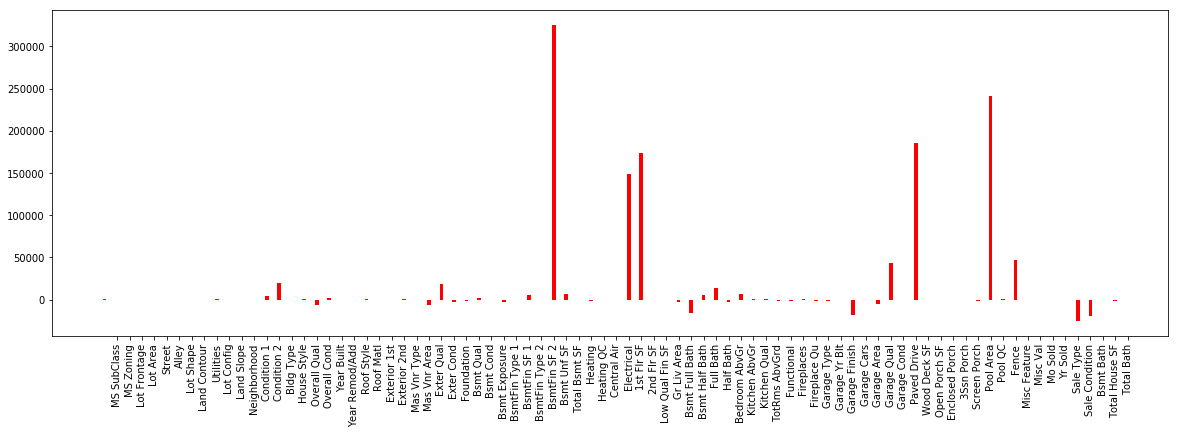

In [275]:
# plot a histogram chart to illustrate :

x_tick_label=list(data.columns)
hist_val=regr_dif0.coef_
fig, ax = plt.subplots(figsize=(20,6))
index=np.arange(len(regr_dif0.coef_))
ax.bar(index,hist_val, .3, color='r')
ax.set_xticks(range(1, 83, 1))
ax.set_xticklabels(x_tick_label, rotation='vertical')
plt.show()